In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [2]:
x = np.zeros(5500)
x[2000] = .8
x[3200] = 1.
x[4000] = .3
x[4700] = .2

In [3]:
x = gaussian_filter1d(x, 8.)
x /= np.max(x)

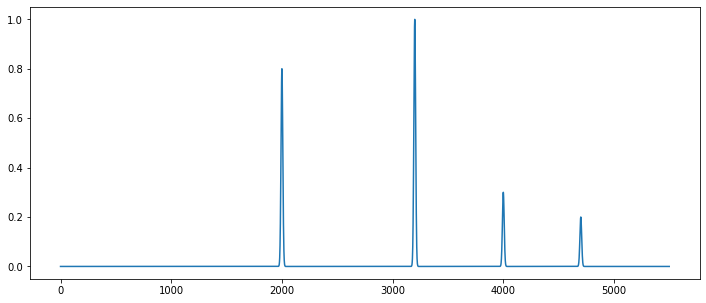

In [4]:
plt.figure(figsize=(12,5))
plt.plot(x)
plt.show()

In [5]:
def generate_noise(spectra, cheb_coefs=(-0.2,0.2), noise_range=(0.02,0.05)):
    datapoints = spectra.shape[1]
    # background function using a chebyshev polynomial
    rng = np.random.default_rng(1)
    cheb = np.zeros_like(spectra)
    for i in range(cheb.shape[0]):
        polynom_order = rng.integers(3,7)
        ccoefs = rng.uniform(cheb_coefs[0]/polynom_order, 
                             cheb_coefs[1]/polynom_order,
                             (polynom_order))
        c = np.polynomial.chebyshev.Chebyshev(ccoefs)
        cheb[i,:] = c.linspace(datapoints)[1]
    # correction to avoid negative background
    negative = np.min(cheb, axis=1) < 0
    cheb = cheb + (np.abs(np.min(cheb, axis=1)) * negative)[:,None]
    
    # gaussian noise -> dependent on signal
    # we want to avoid extreme outliers so we clip the noise
    # with 1/3 and -3/+3 we achieve a nice normal distribution for values -1 to 1
    gaus = 1/3 * np.clip(rng.normal(0, 1, spectra.shape), -3, 3)
    # next we shift the noise from -1 and 1 to 0 and 1
    gaus = (gaus*.5)+.5
    
    noise_lvl = rng.uniform(noise_range[0],noise_range[1], spectra.shape[0])
   
    # combining everything together
    noisy_scan = np.add(spectra,gaus*noise_lvl[:,None])
    noisy_scan += cheb
    return noisy_scan

In [6]:
plt.rcParams['font.size'] = 14

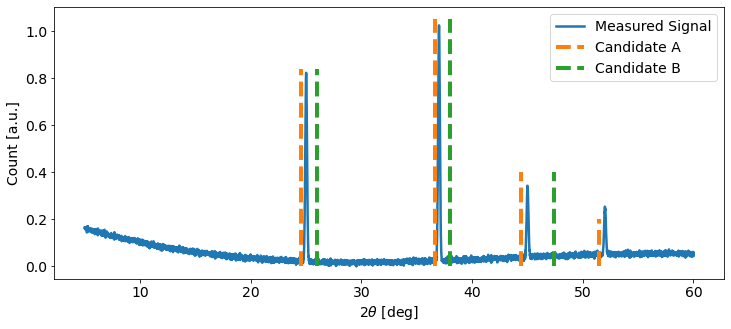

In [7]:
plt.figure(figsize=(12,5))
plt.plot(np.linspace(5,60,5500), generate_noise(x[None,:])[0], lw=2.5, label='Measured Signal')
plt.plot([24.5,24.5],[0.,.84],'--',c='C1', lw=4, label='Candidate A')
plt.plot([36.6,36.6],[0.,1.05],'--',c='C1', lw=4)
plt.plot([44.4,44.4],[0.,.4],'--',c='C1', lw=4)
plt.plot([51.5,51.5],[0.,.2],'--',c='C1', lw=4)
plt.plot([26.,26.],[0.,.84],'--',c='C2', lw=4, label='Candidate B')
plt.plot([38.,38.],[0.,1.05],'--',c='C2', lw=4)
plt.plot([47.4,47.4],[0.,.4],'--',c='C2', lw=4)
plt.legend()
plt.xlabel(r'$2\theta$ [deg]')
plt.ylabel('Count [a.u.]')
plt.savefig('example_spectrum.png', dpi=500, bbox_inches='tight')
#plt.show()

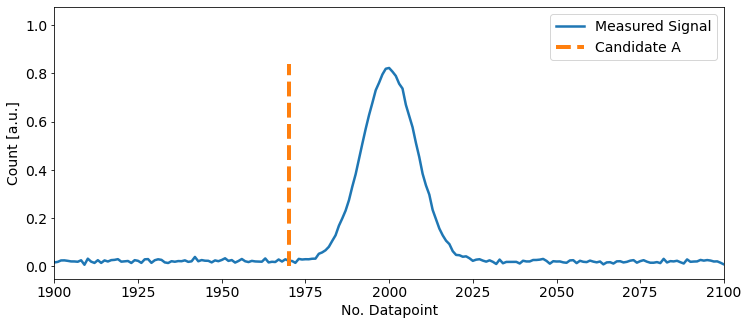

In [8]:
plt.figure(figsize=(12,5))
plt.plot(generate_noise(x[None,:])[0], lw=2.5, label='Measured Signal')
plt.plot([1970,1970],[0.,.84],'--',c='C1', lw=4, label='Candidate A')
plt.xlim(1900,2100)
plt.legend()
plt.xlabel('No. Datapoint')
plt.ylabel('Count [a.u.]')
plt.savefig('example_datapoints.png', dpi=500, bbox_inches='tight')
#plt.show()